In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set

**Appliances energy prediction Data Set**

**Data Set Information:**

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

http://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

**Attribute Information:**

date time year-month-day hour:minute:second
Appliances, energy use in Wh
lights, energy use of light fixtures in the house in Wh
T1, Temperature in kitchen area, in Celsius
RH_1, Humidity in kitchen area, in %
T2, Temperature in living room area, in Celsius
RH_2, Humidity in living room area, in %
T3, Temperature in laundry room area
RH_3, Humidity in laundry room area, in %
T4, Temperature in office room, in Celsius
RH_4, Humidity in office room, in %
T5, Temperature in bathroom, in Celsius
RH_5, Humidity in bathroom, in %
T6, Temperature outside the building (north side), in Celsius
RH_6, Humidity outside the building (north side), in %
T7, Temperature in ironing room , in Celsius
RH_7, Humidity in ironing room, in %
T8, Temperature in teenager room 2, in Celsius
RH_8, Humidity in teenager room 2, in %
T9, Temperature in parents room, in Celsius
RH_9, Humidity in parents room, in %
To, Temperature outside (from Chievres weather station), in Celsius
Pressure (from Chievres weather station), in mm Hg
RH_out, Humidity outside (from Chievres weather station), in %
Wind speed (from Chievres weather station), in m/s
Visibility (from Chievres weather station), in km
Tdewpoint (from Chievres weather station), Â°C
rv1, Random variable 1, nondimensional
rv2, Random variable 2, nondimensional

Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.

# Overview
The goal of this project is to predict data 24 hours into the future.

In [2]:
df = pd.read_csv('DATA/energydata_complete.csv',index_col=['date'],
               parse_dates=['date'])

In [3]:
df.head(10)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,45.730000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,45.790000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,45.863333,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,45.790000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


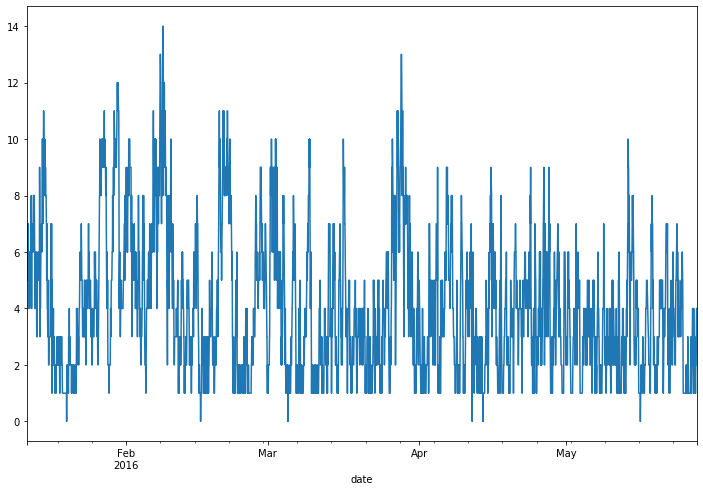

In [5]:
df['Windspeed'].plot(figsize=(12,8))

**Note:** It looks like we just need one for our training data so I'll select the last month which is the month of May.

In [6]:
len(df)

19735

In [7]:
df.loc['2016-05-01':]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.200000,38.200000,18.390000,41.400000,23.200000,36.400000,19.730000,37.730000,...,19.166667,38.200000,4.300000,763.700000,86.000000,2.000000,40.000000,2.200000,15.310003,15.310003
2016-05-01 00:10:00,60,0,21.150000,38.172500,18.390000,41.500000,23.133333,36.466667,19.700000,37.663333,...,19.133333,38.290000,4.283333,763.716667,86.333333,2.166667,38.166667,2.216667,11.240067,11.240067
2016-05-01 00:20:00,50,0,21.133333,38.090000,18.323333,41.500000,23.200000,36.500000,19.700000,37.590000,...,19.133333,38.363333,4.266667,763.733333,86.666667,2.333333,36.333333,2.233333,21.808814,21.808814
2016-05-01 00:30:00,50,0,21.100000,38.090000,18.290000,41.500000,23.200000,36.500000,19.700000,37.500000,...,19.166667,38.500000,4.250000,763.750000,87.000000,2.500000,34.500000,2.250000,47.000534,47.000534
2016-05-01 00:40:00,60,0,21.100000,38.030000,18.290000,41.560000,23.200000,36.500000,19.700000,37.500000,...,19.166667,38.633333,4.233333,763.766667,87.333333,2.666667,32.666667,2.266667,8.059441,8.059441
2016-05-01 00:50:00,40,0,21.066667,38.000000,18.200000,41.530000,23.200000,36.500000,19.666667,37.400000,...,19.100000,38.826667,4.216667,763.783333,87.666667,2.833333,30.833333,2.283333,40.981831,40.981831
2016-05-01 01:00:00,60,0,21.000000,38.000000,18.200000,41.590000,23.200000,36.560000,19.600000,37.326667,...,19.100000,38.966667,4.200000,763.800000,88.000000,3.000000,29.000000,2.300000,1.251692,1.251692
2016-05-01 01:10:00,50,0,21.000000,37.900000,18.166667,41.590000,23.200000,36.500000,19.600000,37.290000,...,19.100000,39.000000,4.116667,763.850000,88.333333,3.000000,28.500000,2.283333,42.684241,42.684241
2016-05-01 01:20:00,60,0,21.000000,37.900000,18.100000,41.590000,23.200000,36.500000,19.600000,37.290000,...,19.100000,39.133333,4.033333,763.900000,88.666667,3.000000,28.000000,2.266667,38.870376,38.870376


In [8]:
df_may = df.loc['2016-05-01':]

The data seems to have high precision and might be an issue when we transform the data. I will round off the data to 2 decimal point.

In [9]:
df_may = df_may.round(2)

In [10]:
len(df_may)

3853

Data were provided in 10 min interval so we will need to get the number of 10 min per day times the number of test days.
(24*60)/10

In [11]:
test_days = 2

In [12]:
(24*60)/10

144.0

In [13]:
test_ind = test_days*144

In [14]:
#train = from the beginning all the way to the -288
train = df_may.iloc[:-test_ind] 
#test = from the last row to the -288
test = df_may.iloc[-test_ind:]

In [15]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.10,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.10,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.10,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.10,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.10,55.17,2.00,30.83,7.28,10.27,10.27
2016-05-25 19:00:00,120,0,24.48,37.13,23.67,34.63,24.84,36.53,24.27,37.96,...,22.10,37.89,16.40,756.10,55.00,2.00,29.00,7.20,46.65,46.65
2016-05-25 19:10:00,120,0,24.46,37.20,23.65,34.75,24.85,36.57,24.25,37.99,...,22.10,37.98,16.37,756.10,55.33,1.83,30.83,7.27,49.58,49.58
2016-05-25 19:20:00,130,0,24.45,37.26,23.63,34.86,24.85,36.61,24.24,38.02,...,22.10,38.06,16.33,756.10,55.67,1.67,32.67,7.33,48.47,48.47
2016-05-25 19:30:00,110,0,24.44,37.33,23.62,34.98,24.85,36.64,24.23,38.05,...,22.10,38.14,16.30,756.10,56.00,1.50,34.50,7.40,17.58,17.58


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [19]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [20]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [21]:
length = 144 #length of output (a full day output for 24 hours)
batch_size = 1 #number of timeserices samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [22]:
len(scaled_train)

3565

In [23]:
X,y = generator[0]

In [24]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03896104 0.         0.13798978 ... 0.14319527 0.75185111 0.75185111]
Predict this y: 
 [[0.03896104 0.         0.30834753 0.29439421 0.16038492 0.49182278
  0.0140056  0.36627907 0.24142857 0.24364791 0.12650602 0.36276002
  0.12       0.28205572 0.06169297 0.15759185 0.34582624 0.39585974
  0.09259259 0.39649608 0.18852459 0.96052632 0.59210526 0.1
  0.58333333 0.13609467 0.4576746  0.4576746 ]]


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [26]:
scaled_train.shape

(3565, 28)

In [27]:
model = Sequential()

n_features = 28

model.add(LSTM(100,input_shape=(length,n_features)))

model.add(Dense(n_features))

model.compile(optimizer='adam', loss='mse')


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               51600     
_________________________________________________________________
dense (Dense)                (None, 28)                2828      
Total params: 54,428
Trainable params: 54,428
Non-trainable params: 0
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

In [30]:
model.fit_generator(generator,epochs=3,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3421 steps, validate for 144 steps
Epoch 1/3
3421/3421 [==============================] - 232s 68ms/step - loss: 0.0114 - val_loss: 0.0103
Epoch 2/3
3421/3421 [==============================] - 230s 67ms/step - loss: 0.0079 - val_loss: 0.0085
Epoch 3/3
3421/3421 [==============================] - 227s 66ms/step - loss: 0.0075 - val_loss: 0.0085


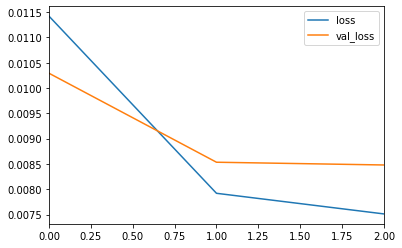

In [31]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [32]:
first_eval_batch = scaled_train[-length:]
first_eval_batch

array([[0.1038961 , 0.        , 0.72231687, ..., 0.53550296, 0.15909546,
        0.15909546],
       [0.11688312, 0.        , 0.73424191, ..., 0.52662722, 0.40344207,
        0.40344207],
       [0.11688312, 0.        , 0.73424191, ..., 0.51775148, 0.20452271,
        0.20452271],
       ...,
       [0.18181818, 0.        , 0.70017036, ..., 0.50118343, 0.33340004,
        0.33340004],
       [0.09090909, 0.        , 0.70017036, ..., 0.51952663, 0.78747248,
        0.78747248],
       [0.1038961 , 0.        , 0.70017036, ..., 0.53846154, 0.77286372,
        0.77286372]])

In [33]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    #print(current_pred)
    #print(len(current_pred))
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)





In [35]:
scaled_test

array([[0.19480519, 0.        , 0.70017036, ..., 0.53372781, 0.76305783,
        0.76305783],
       [0.37662338, 0.        , 0.70017036, ..., 0.52840237, 0.62337402,
        0.62337402],
       [0.12987013, 0.        , 0.70017036, ..., 0.52366864, 0.08785271,
        0.08785271],
       ...,
       [0.32467532, 0.33333333, 0.87052811, ..., 0.86804734, 0.58415049,
        0.58415049],
       [0.51948052, 0.33333333, 0.87052811, ..., 0.86568047, 0.12627577,
        0.12627577],
       [0.53246753, 0.33333333, 0.87052811, ..., 0.86390533, 0.68260957,
        0.68260957]])

In [36]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 89.9220255 ,   2.61595532,  24.53204953, ...,   7.83930657,
         22.56528657,  23.03046742],
       [ 80.17067842,   3.61436918,  24.53640762, ...,   7.85455233,
         22.700499  ,  23.3074657 ],
       [ 77.6364509 ,   4.14877295,  24.5127103 , ...,   7.76887184,
         22.73719641,  23.26129981],
       ...,
       [144.33078393,  12.06018269,  23.0696917 , ...,  28.99082524,
         19.59771677,  25.55152228],
       [144.33077246,  12.0601818 ,  23.06969135, ...,  28.99082725,
         19.59771379,  25.55151632],
       [144.33074951,  12.06018537,  23.0696917 , ...,  28.99082524,
         19.5977123 ,  25.55151632]])

In [37]:
test

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-25 18:10:00,170,0,24.50,37.86,24.00,34.27,25.00,36.70,24.29,37.79,...,22.00,37.23,16.48,756.10,55.83,2.00,38.17,7.62,38.14,38.14
2016-05-25 18:20:00,310,0,24.50,37.30,23.86,34.33,24.94,36.67,24.29,37.79,...,22.00,37.36,16.47,756.10,55.67,2.00,36.33,7.53,31.16,31.16
2016-05-25 18:30:00,120,0,24.50,36.96,23.73,34.33,24.85,36.50,24.29,37.79,...,22.03,37.39,16.45,756.10,55.50,2.00,34.50,7.45,4.40,4.40
2016-05-25 18:40:00,120,0,24.50,37.00,23.70,34.40,24.84,36.45,24.29,37.90,...,22.10,37.72,16.43,756.10,55.33,2.00,32.67,7.37,27.12,27.12
2016-05-25 18:50:00,120,0,24.49,37.07,23.68,34.52,24.84,36.49,24.28,37.93,...,22.10,37.81,16.42,756.10,55.17,2.00,30.83,7.28,10.27,10.27
2016-05-25 19:00:00,120,0,24.48,37.13,23.67,34.63,24.84,36.53,24.27,37.96,...,22.10,37.89,16.40,756.10,55.00,2.00,29.00,7.20,46.65,46.65
2016-05-25 19:10:00,120,0,24.46,37.20,23.65,34.75,24.85,36.57,24.25,37.99,...,22.10,37.98,16.37,756.10,55.33,1.83,30.83,7.27,49.58,49.58
2016-05-25 19:20:00,130,0,24.45,37.26,23.63,34.86,24.85,36.61,24.24,38.02,...,22.10,38.06,16.33,756.10,55.67,1.67,32.67,7.33,48.47,48.47
2016-05-25 19:30:00,110,0,24.44,37.33,23.62,34.98,24.85,36.64,24.23,38.05,...,22.10,38.14,16.30,756.10,56.00,1.50,34.50,7.40,17.58,17.58


In [38]:
forecast_index = pd.date_range(start='2016-05-27 18:10:00',periods=len(test),
                              freq="10T")
forecast_index

DatetimeIndex(['2016-05-27 18:10:00', '2016-05-27 18:20:00',
               '2016-05-27 18:30:00', '2016-05-27 18:40:00',
               '2016-05-27 18:50:00', '2016-05-27 19:00:00',
               '2016-05-27 19:10:00', '2016-05-27 19:20:00',
               '2016-05-27 19:30:00', '2016-05-27 19:40:00',
               ...
               '2016-05-29 16:30:00', '2016-05-29 16:40:00',
               '2016-05-29 16:50:00', '2016-05-29 17:00:00',
               '2016-05-29 17:10:00', '2016-05-29 17:20:00',
               '2016-05-29 17:30:00', '2016-05-29 17:40:00',
               '2016-05-29 17:50:00', '2016-05-29 18:00:00'],
              dtype='datetime64[ns]', length=288, freq='10T')

In [39]:
len(true_predictions)

288

In [40]:
true_predictions = pd.DataFrame(data=true_predictions,index=forecast_index,columns=test.columns)
true_predictions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 2016-05-27 18:10:00 to 2016-05-29 18:00:00
Freq: 10T
Data columns (total 28 columns):
Appliances     288 non-null float64
lights         288 non-null float64
T1             288 non-null float64
RH_1           288 non-null float64
T2             288 non-null float64
RH_2           288 non-null float64
T3             288 non-null float64
RH_3           288 non-null float64
T4             288 non-null float64
RH_4           288 non-null float64
T5             288 non-null float64
RH_5           288 non-null float64
T6             288 non-null float64
RH_6           288 non-null float64
T7             288 non-null float64
RH_7           288 non-null float64
T8             288 non-null float64
RH_8           288 non-null float64
T9             288 non-null float64
RH_9           288 non-null float64
T_out          288 non-null float64
Press_mm_hg    288 non-null float64
RH_out         288 non-null float64
Windspeed      288 n

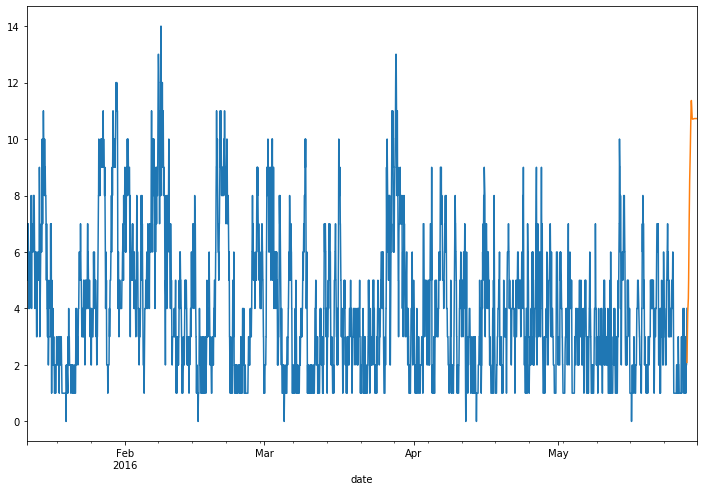

In [41]:
ax=df['Windspeed'].plot(figsize=(12,8))
true_predictions['Windspeed'].plot(ax=ax)